<a href="https://colab.research.google.com/github/AlifAshrafee/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining/blob/main/DM_Assignment_Apriori_FP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Dependencies

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cloning the Repository for Source Files and Dataset

In [2]:
!git clone https://github.com/AlifAshrafee/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining.git

fatal: destination path 'Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining' already exists and is not an empty directory.


In [118]:
%cd /content/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining/

/content/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining


# Dataset 1

## Loading and Inspecting Dataset 1

In [119]:
groceries = pd.read_csv("Dataset/Groceries_dataset.csv")

In [59]:
print(groceries.shape)
groceries.head()

(38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Preprocessing Dataset 1 to Feed into the Algorithms

In [120]:
groups = groceries.groupby(['Member_number', 'Date'])
groups.first()

itemDescription
Member_number Date                             
1000          15-03-2015                sausage
              24-06-2014             whole milk
              24-07-2015            canned beer
              25-11-2015                sausage
              27-05-2015                   soda
...                                         ...
4999          24-01-2015         tropical fruit
              26-12-2015          bottled water
5000          09-03-2014  fruit/vegetable juice
              10-02-2015                   soda
              16-11-2014           bottled beer

[14963 rows x 1 columns]

In [121]:
transactions = list(groups)
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in transactions]

In [62]:
print(len(all_transactions))
all_transactions[:10]

14963


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

## Applying Apriori Algorithm to Dataset 1

In [122]:
%cd Source/

/content/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining/Source


In [64]:
from apriori import apriori

start_time = time.time()
freqItemSet, rules = apriori(all_transactions, minSup=0.01, minConf=0.05)
apriori_total_execution = time.time() - start_time
print("Apriori execution took: {} seconds".format(apriori_total_execution))

Apriori execution took: 12.800943613052368 seconds


In [65]:
for item in freqItemSet.items():
  print(f"Itemsets of length {item[0]}:\n{item[1]}")

Itemsets of length 1:
{frozenset({'candy'}), frozenset({'curd'}), frozenset({'chewing gum'}), frozenset({'processed cheese'}), frozenset({'butter'}), frozenset({'tropical fruit'}), frozenset({'cream cheese '}), frozenset({'butter milk'}), frozenset({'white bread'}), frozenset({'napkins'}), frozenset({'chocolate'}), frozenset({'other vegetables'}), frozenset({'herbs'}), frozenset({'sugar'}), frozenset({'frozen vegetables'}), frozenset({'dessert'}), frozenset({'whole milk'}), frozenset({'beef'}), frozenset({'coffee'}), frozenset({'yogurt'}), frozenset({'sliced cheese'}), frozenset({'whipped/sour cream'}), frozenset({'bottled beer'}), frozenset({'beverages'}), frozenset({'salty snack'}), frozenset({'ham'}), frozenset({'margarine'}), frozenset({'newspapers'}), frozenset({'fruit/vegetable juice'}), frozenset({'bottled water'}), frozenset({'sausage'}), frozenset({'frozen meals'}), frozenset({'red/blush wine'}), frozenset({'citrus fruit'}), frozenset({'onions'}), frozenset({'ice cream'}), fro

In [66]:
for rule in rules:
  print(rule)

[{'whole milk'}, {'yogurt'}, 0.07067287346593314]
[{'whole milk'}, {'soda'}, 0.07363520947947524]
[{'other vegetables'}, {'rolls/buns'}, 0.08648056923918993]
[{'whole milk'}, {'rolls/buns'}, 0.08844688954718578]
[{'whole milk'}, {'other vegetables'}, 0.09394837071519255]
[{'rolls/buns'}, {'other vegetables'}, 0.0959902794653706]
[{'soda'}, {'whole milk'}, 0.11975223675154852]
[{'other vegetables'}, {'whole milk'}, 0.12151067323481117]
[{'rolls/buns'}, {'whole milk'}, 0.12697448359659783]
[{'yogurt'}, {'whole milk'}, 0.12996108949416343]


## Applying FP Growth Algorithm to Dataset 1

In [67]:
from fpgrowth import fpgrowth

start_time = time.time()
freqItemSet, rules = fpgrowth(all_transactions, minSupRatio=0.01, minConf=0.05)
fp_growth_total_execution = time.time() - start_time
print("FP Growth execution took: {} seconds".format(fp_growth_total_execution))

FP Growth execution took: 0.8250226974487305 seconds


In [68]:
frequency_list = {}

for item in freqItemSet:
  if len(item) in frequency_list.keys():
    frequency_list[len(item)].append(item)
  else:
    frequency_list[len(item)] = [item]

for item in frequency_list.items():
  print(f"Itemsets of length {item[0]}:\n{item[1]}")

Itemsets of length 1:
[{'processed cheese'}, {'soft cheese'}, {'red/blush wine'}, {'herbs'}, {'white wine'}, {'cat food'}, {'chewing gum'}, {'hygiene articles'}, {'specialty bar'}, {'sliced cheese'}, {'candy'}, {'grapes'}, {'hard cheese'}, {'oil'}, {'ice cream'}, {'misc. beverages'}, {'specialty chocolate'}, {'beverages'}, {'frozen meals'}, {'meat'}, {'ham'}, {'butter milk'}, {'sugar'}, {'long life bakery product'}, {'waffles'}, {'salty snack'}, {'onions'}, {'UHT-milk'}, {'hamburger meat'}, {'berries'}, {'napkins'}, {'dessert'}, {'chocolate'}, {'cream cheese '}, {'white bread'}, {'chicken'}, {'frozen vegetables'}, {'coffee'}, {'margarine'}, {'curd'}, {'beef'}, {'fruit/vegetable juice'}, {'butter'}, {'domestic eggs'}, {'pork'}, {'brown bread'}, {'frankfurter'}, {'newspapers'}, {'whipped/sour cream'}, {'bottled beer'}, {'canned beer'}, {'shopping bags'}, {'pip fruit'}, {'pastry'}, {'citrus fruit'}, {'sausage'}, {'bottled water'}, {'tropical fruit'}, {'root vegetables'}, {'yogurt'}, {'sod

In [69]:
for rule in rules:
  print(rule)

[{'yogurt'}, {'whole milk'}, 0.12996108949416343]
[{'whole milk'}, {'yogurt'}, 0.07067287346593314]
[{'soda'}, {'other vegetables'}, 0.09979353062629043]
[{'other vegetables'}, {'soda'}, 0.07936507936507936]
[{'soda'}, {'whole milk'}, 0.11975223675154852]
[{'whole milk'}, {'soda'}, 0.07363520947947524]
[{'other vegetables'}, {'rolls/buns'}, 0.08648056923918993]
[{'rolls/buns'}, {'other vegetables'}, 0.0959902794653706]
[{'rolls/buns'}, {'whole milk'}, 0.12697448359659783]
[{'whole milk'}, {'rolls/buns'}, 0.08844688954718578]
[{'other vegetables'}, {'whole milk'}, 0.12151067323481117]
[{'whole milk'}, {'other vegetables'}, 0.09394837071519255]


## Comparative Analysis of Apriori and FP Growth in Dataset 1

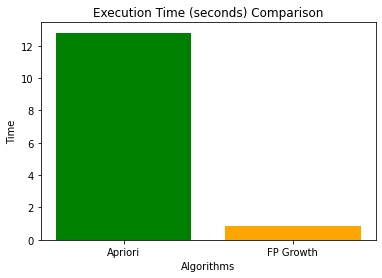

In [70]:
plt.bar([0, 1], [apriori_total_execution, fp_growth_total_execution], color=['green', 'orange'])
plt.xticks([0, 1], ("Apriori", "FP Growth"))
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title("Execution Time (seconds) Comparison")
plt.show()

## Running Apriori and FP Growth with Multiple Min Support Thresholds on Dataset 1

In [123]:
configs = [0.01, 0.03, 0.05, 0.07, 0.1, 0.12]
apriori_times = []
fp_growth_times = []

for config in configs:
  start_time = time.time()
  freqItemSet, rules = apriori(all_transactions, minSup=config, minConf=0.05)
  end_time = time.time() - start_time
  apriori_times.append(end_time)

  start_time = time.time()
  freqItemSet, rules = fpgrowth(all_transactions, minSupRatio=config, minConf=0.05)
  end_time = time.time() - start_time
  fp_growth_times.append(end_time)

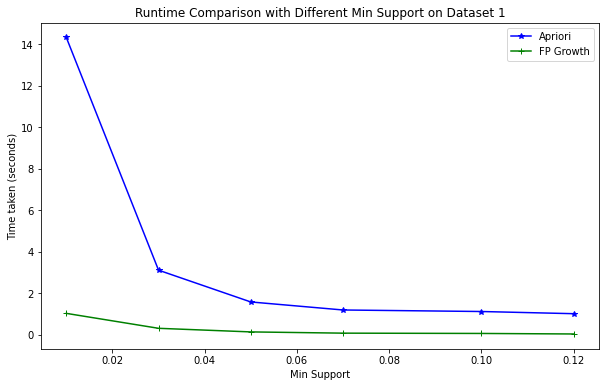

In [124]:
plt.figure(figsize=(10,6))
plt.plot(configs, apriori_times, 'b*-')
plt.plot(configs, fp_growth_times, 'g+-')
plt.title('Runtime Comparison with Different Min Support on Dataset 1')
plt.xlabel('Min Support')
plt.ylabel('Time taken (seconds)')
plt.legend(["Apriori", "FP Growth"], loc ="upper right")
plt.show()

# Dataset 2

## Loading and Inspecting Dataset 2

In [79]:
cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
retail_items = pd.read_csv("/content/Apriori-and-FP-Growth-Algorithm-in-Frequent-Pattern-Mining/Dataset/DataSetA.csv", names=cols)

In [80]:
print(retail_items.shape)
retail_items.head(10)

(12526, 10)


,A,B,C,D,E,F,G,H,I,J
0,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,NaN,NaN,NaN,NaN
1,Ghee,Coffee Powder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lassi,Tea Powder,Butter,Cheese,NaN,NaN,NaN,NaN,NaN,NaN
3,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,NaN,NaN,NaN,NaN
4,Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,NaN,NaN,NaN,NaN
5,Sugar,Tea Powder,Ghee,Sweet,Panner,Milk,NaN,NaN,NaN,NaN
6,Sweet,Coffee Powder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Butter,Ghee,Panner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sweet,Tea Powder,Butter,Yougurt,Sugar,Cheese,NaN,NaN,NaN,NaN
9,Panner,Ghee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing Dataset 2 to Feed into the Algorithms

In [81]:
all_transactions = []

for transaction in range(len(retail_items)):
  items = list(retail_items.iloc[transaction])
  cleaned_items = [x for x in items if x == x]
  all_transactions.append(cleaned_items)

In [82]:
print(len(all_transactions))
all_transactions[:10]

12526


[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese'],
 ['Ghee', 'Coffee Powder'],
 ['Lassi', 'Tea Powder', 'Butter', 'Cheese'],
 ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'],
 ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'],
 ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk'],
 ['Sweet', 'Coffee Powder'],
 ['Butter', 'Ghee', 'Panner'],
 ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese'],
 ['Panner', 'Ghee']]

## Applying Apriori Algorithm to Dataset 2

In [111]:
from apriori import apriori

start_time = time.time()
freqItemSet, rules = apriori(all_transactions, minSup=0.2, minConf=0.4)
apriori_total_execution = time.time() - start_time
print("Apriori execution took: {} seconds".format(apriori_total_execution))

Apriori execution took: 0.6894240379333496 seconds


In [112]:
for item in freqItemSet.items():
  print(f"Itemsets of length {item[0]}:\n{item[1]}")

Itemsets of length 1:
{frozenset({'Lassi'}), frozenset({'Milk'}), frozenset({'Panner'}), frozenset({'Sweet'}), frozenset({'Tea Powder'}), frozenset({'Bread'}), frozenset({'Ghee'}), frozenset({'Yougurt'}), frozenset({'Sugar'}), frozenset({'Coffee Powder'}), frozenset({'Butter'}), frozenset({'Cheese'})}
Itemsets of length 2:
{frozenset({'Sweet', 'Lassi'}), frozenset({'Cheese', 'Yougurt'}), frozenset({'Butter', 'Yougurt'}), frozenset({'Ghee', 'Butter'}), frozenset({'Cheese', 'Coffee Powder'}), frozenset({'Milk', 'Sugar'}), frozenset({'Ghee', 'Milk'}), frozenset({'Yougurt', 'Milk'}), frozenset({'Sweet', 'Bread'}), frozenset({'Butter', 'Sugar'}), frozenset({'Ghee', 'Sugar'}), frozenset({'Coffee Powder', 'Bread'}), frozenset({'Yougurt', 'Sugar'}), frozenset({'Sweet', 'Milk'}), frozenset({'Yougurt', 'Bread'}), frozenset({'Panner', 'Bread'}), frozenset({'Ghee', 'Lassi'}), frozenset({'Ghee', 'Panner'}), frozenset({'Yougurt', 'Coffee Powder'}), frozenset({'Ghee', 'Coffee Powder'}), frozenset({'S

In [113]:
for rule in rules:
  print(rule)

[{'Milk'}, {'Ghee'}, 0.4541176470588235]
[{'Milk'}, {'Yougurt'}, 0.4544796380090498]
[{'Milk'}, {'Sweet'}, 0.4546606334841629]
[{'Milk'}, {'Bread'}, 0.4553846153846154]
[{'Ghee'}, {'Milk'}, 0.45543655835904884]
[{'Ghee'}, {'Lassi'}, 0.45543655835904884]
[{'Yougurt'}, {'Bread'}, 0.455470737913486]
[{'Milk'}, {'Coffee Powder'}, 0.4555656108597285]
[{'Coffee Powder'}, {'Lassi'}, 0.45579960065347613]
[{'Yougurt'}, {'Milk'}, 0.4563794983642312]
[{'Ghee'}, {'Sugar'}, 0.4565256852423307]
[{'Coffee Powder'}, {'Cheese'}, 0.456888727536758]
[{'Coffee Powder'}, {'Milk'}, 0.456888727536758]
[{'Bread'}, {'Yougurt'}, 0.45696571845368344]
[{'Ghee'}, {'Panner'}, 0.45707024868397167]
[{'Sweet'}, {'Milk'}, 0.4581433521794638]
[{'Sugar'}, {'Ghee'}, 0.4587741700109449]
[{'Bread'}, {'Milk'}, 0.4587892049598833]
[{'Coffee Powder'}, {'Bread'}, 0.4588854601561082]
[{'Ghee'}, {'Butter'}, 0.45906698130332185]
[{'Milk'}, {'Lassi'}, 0.45918552036199095]
[{'Yougurt'}, {'Butter'}, 0.45946928389676484]
[{'Yougurt'},

## Applying FP Growth Algorithm to Dataset 2

In [98]:
from fpgrowth import fpgrowth

start_time = time.time()
freqItemSet, rules = fpgrowth(all_transactions, minSupRatio=0.2, minConf=0.4)
fp_growth_total_execution = time.time() - start_time
print("FP Growth execution took: {} seconds".format(fp_growth_total_execution))

FP Growth execution took: 1.3111588954925537 seconds


In [99]:
frequency_list = {}

for item in freqItemSet:
  if len(item) in frequency_list.keys():
    frequency_list[len(item)].append(item)
  else:
    frequency_list[len(item)] = [item]

for item in frequency_list.items():
  print(f"Itemsets of length {item[0]}:\n{item[1]}")

Itemsets of length 1:
[{'Tea Powder'}, {'Lassi'}, {'Panner'}, {'Cheese'}, {'Butter'}, {'Sugar'}, {'Sweet'}, {'Bread'}, {'Yougurt'}, {'Coffee Powder'}, {'Ghee'}, {'Milk'}]
Itemsets of length 2:
[{'Ghee', 'Lassi'}, {'Coffee Powder', 'Lassi'}, {'Milk', 'Lassi'}, {'Sweet', 'Lassi'}, {'Ghee', 'Panner'}, {'Panner', 'Bread'}, {'Cheese', 'Coffee Powder'}, {'Cheese', 'Bread'}, {'Cheese', 'Yougurt'}, {'Yougurt', 'Butter'}, {'Ghee', 'Butter'}, {'Sweet', 'Butter'}, {'Butter', 'Sugar'}, {'Ghee', 'Sugar'}, {'Yougurt', 'Sugar'}, {'Milk', 'Sugar'}, {'Sweet', 'Milk'}, {'Sweet', 'Bread'}, {'Yougurt', 'Bread'}, {'Milk', 'Bread'}, {'Coffee Powder', 'Bread'}, {'Yougurt', 'Milk'}, {'Yougurt', 'Coffee Powder'}, {'Milk', 'Coffee Powder'}, {'Ghee', 'Milk'}]


In [100]:
for rule in rules:
  print(rule)

[{'Ghee'}, {'Lassi'}, 0.45543655835904884]
[{'Lassi'}, {'Ghee'}, 0.46197753636531025]
[{'Coffee Powder'}, {'Lassi'}, 0.45579960065347613]
[{'Lassi'}, {'Coffee Powder'}, 0.4623457926716995]
[{'Milk'}, {'Lassi'}, 0.45918552036199095]
[{'Lassi'}, {'Milk'}, 0.4671331246547597]
[{'Sweet'}, {'Lassi'}, 0.4698157942732081]
[{'Lassi'}, {'Sweet'}, 0.47431412262935]
[{'Ghee'}, {'Panner'}, 0.45707024868397167]
[{'Panner'}, {'Ghee'}, 0.46286764705882355]
[{'Panner'}, {'Bread'}, 0.4681985294117647]
[{'Bread'}, {'Panner'}, 0.4644420131291028]
[{'Cheese'}, {'Coffee Powder'}, 0.4596420745069394]
[{'Coffee Powder'}, {'Cheese'}, 0.456888727536758]
[{'Cheese'}, {'Bread'}, 0.4620160701241782]
[{'Bread'}, {'Cheese'}, 0.4613420860685631]
[{'Cheese'}, {'Yougurt'}, 0.46219868517165813]
[{'Yougurt'}, {'Cheese'}, 0.46001454016721194]
[{'Yougurt'}, {'Butter'}, 0.45946928389676484]
[{'Butter'}, {'Yougurt'}, 0.46122970260901297]
[{'Ghee'}, {'Butter'}, 0.45906698130332185]
[{'Butter'}, {'Ghee'}, 0.4614121510673235]


## Comparative Analysis of Apriori and FP Growth in Dataset 2

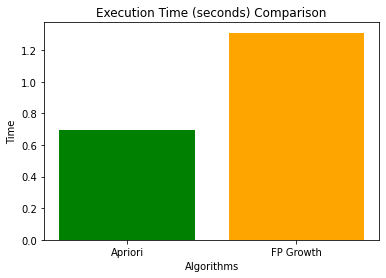

In [101]:
plt.bar([0, 1], [apriori_total_execution, fp_growth_total_execution], color=['green', 'orange'])
plt.xticks([0, 1], ("Apriori", "FP Growth"))
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title("Execution Time (seconds) Comparison")
plt.show()

## Running Apriori and FP Growth with Multiple Min Support Thresholds on Dataset 2

In [114]:
configs = [0.05, 0.08, 0.1, 0.15, 0.18, 0.2]
apriori_times = []
fp_growth_times = []

for config in configs:
  start_time = time.time()
  freqItemSet, rules = apriori(all_transactions, minSup=config, minConf=0.4)
  end_time = time.time() - start_time
  apriori_times.append(end_time)

  start_time = time.time()
  freqItemSet, rules = fpgrowth(all_transactions, minSupRatio=config, minConf=0.4)
  end_time = time.time() - start_time
  fp_growth_times.append(end_time)

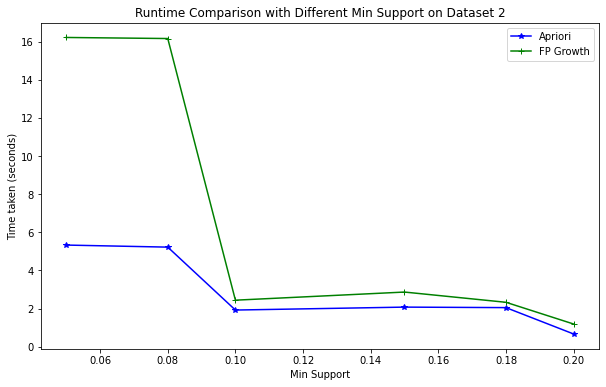

In [116]:
plt.figure(figsize=(10,6))
plt.plot(configs, apriori_times, 'b*-')
plt.plot(configs, fp_growth_times, 'g+-')
plt.title('Runtime Comparison with Different Min Support on Dataset 2')
plt.xlabel('Min Support')
plt.ylabel('Time taken (seconds)')
plt.legend(["Apriori", "FP Growth"], loc ="upper right")
plt.show()